In [166]:
from scipy.optimize import minimize, rosen, rosen_der, minimize_scalar
from numpy import array, append
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin

In [24]:
x0 = [-1.0, -2.0]

In [28]:
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-3)

In [129]:
xxk=array([x0])
def pris(xk):
    global xxk
    xxk = append(xxk,  array([xk]), axis=0)

In [130]:
res = minimize(rosen, x0, method='CG', jac=rosen_der, callback=pris, tol=1e-6, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19
         Function evaluations: 45
         Gradient evaluations: 45


In [34]:
res

     fun: 1.468483063296635e-14
     jac: array([  1.38366615e-07,   5.19698062e-08])
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 19
    njev: 45
  status: 0
 success: True
       x: array([ 1.00000012,  1.00000024])

In [131]:
xxk

array([[-1.        , -2.        ],
       [-0.09602869, -1.54951596],
       [ 0.22403357,  0.05811897],
       [ 0.24739113,  0.05369891],
       [ 0.45376779,  0.19351432],
       [ 0.46512933,  0.22019015],
       [ 0.66100221,  0.42494032],
       [ 0.74424372,  0.5381473 ],
       [ 0.76720066,  0.59363546],
       [ 0.8971366 ,  0.80012412],
       [ 1.00066625,  1.00544753],
       [ 1.01270268,  1.02679591],
       [ 1.01316443,  1.02655568],
       [ 1.01154351,  1.02281677],
       [ 1.00222666,  1.00431313],
       [ 1.00216429,  1.00434203],
       [ 0.99999897,  0.99999298],
       [ 0.99999584,  0.99999166],
       [ 0.99999584,  0.99999166],
       [ 1.00000012,  1.00000024]])

In [117]:
def MyBounds(points):
    xleft = np.min(points[:, 0])
    xright = np.max(points[:, 0])
    yleft = np.min(points[:, 1])
    yright = np.max(points[:, 1])
    xmid = (xleft + xright) / 2
    ymid = (yleft + yright) / 2
    xdiap = xright - xleft
    ydiap = yright - yleft
    maxdiap = np.max([xdiap, ydiap])
    xleft = xmid - 1.2 * maxdiap / 2
    xright = xmid + 1.2 * maxdiap / 2
    yleft = ymid - 1.2 * maxdiap / 2
    yright = ymid + 1.2 * maxdiap / 2
    xBound = [xleft, xright]
    yBound = [yleft, yright]
    return (xBound, yBound)

In [158]:
def MyContourPlot(f, xMinMax, yMinMax):
    delta = (xMinMax[1] - xMinMax[0]) / 20
    x = np.arange(xMinMax[0], xMinMax[1], delta)
    y = np.arange(yMinMax[0], yMinMax[1], delta)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    CS = plt.contourf(X, Y, Z, 1000)
    plt.colorbar(CS)

In [154]:
def MyContourScatterArrowPlot(func, points):
    xBound, yBound = MyBounds(points)
    arrow_head_width = (xBound[1] - xBound[0]) / 50
    h = 7
    fig1 = plt.figure(figsize=(1.2 * h, h))
    MyContourPlot(func, xBound, yBound)
    ppoint = points[0]
    plt.scatter(points[0, 0], points[0, 1], color='black')
    inlen = lin.norm(points[1] - points[0])
    for point in points[1:, :]:
        curlen = lin.norm(point - ppoint)
        #        if 100*curlen < inlen:
        #            break
        plt.scatter(point[0], point[1], color='black')
        plt.arrow(ppoint[0], ppoint[1], point[0] - ppoint[0], point[1] - ppoint[1], head_width=arrow_head_width,
                  color='red', length_includes_head=True)
        ppoint = point
    plt.scatter(points[-1, 0], points[-1, 1], color='black')
    plt.show()

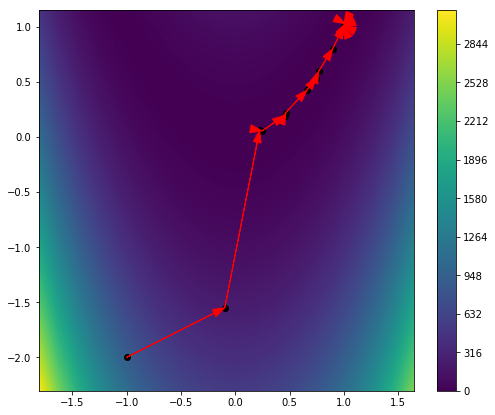

In [159]:
MyContourScatterArrowPlot(rosen, xxk[:, :])

In [162]:
def f1(x):
    return(rosen(array([0.251768, -1.3762]) + x * array([-74.6296, 322.227])))

In [ ]:
x0=array([])

In [172]:
res = minimize_scalar(f1, bracket=(0,0.05), method='brent', tol=1e-6)

In [173]:
res

     fun: 1.1400574807896735
    nfev: 12
     nit: 11
 success: True
       x: 0.0042770946538796739